**This notebook is an exercise in the [Intro to Game AI and Reinforcement Learning](https://www.kaggle.com/learn/intro-to-game-ai-and-reinforcement-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/one-step-lookahead).**

---


# Introduction

In the tutorial, you learned how to define a simple heuristic that the agent used to select moves.  In this exercise, you'll check your understanding and make the heuristic more complex.

To get started, run the code cell below to set up our feedback system.

In [ ]:
from learntools.core import binder
binder.bind(globals())
from learntools.game_ai.ex2 import *

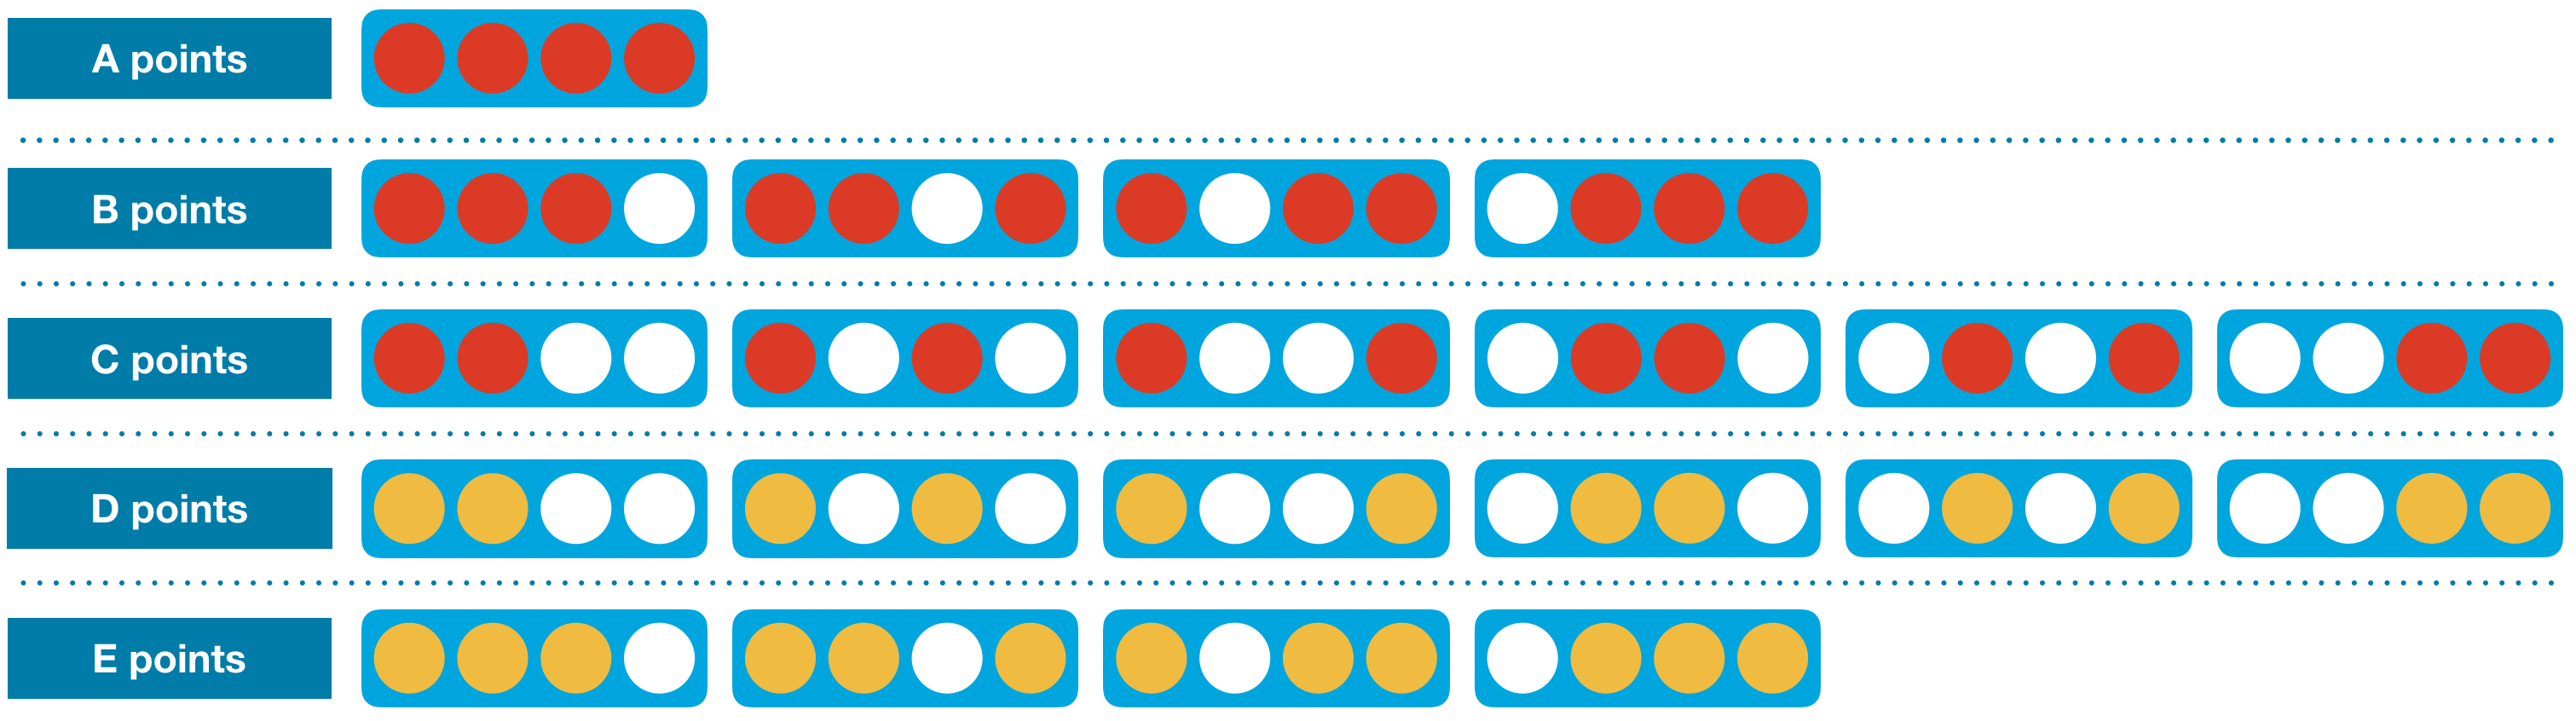### 1) A more complex heuristic

The heuristic from the tutorial looks at all groups of four adjacent grid locations on the same row, column, or diagonal and assigns points for each occurrence of the following patterns:

<center>
<img src="https://i.imgur.com/vzQa4ML.png" width=60%><br/>
</center>

In the image above, we assume that the agent is the red player, and the opponent plays yellow discs.

For reference, here is the `get_heuristic()` function from the tutorial:
```python
def get_heuristic(grid, mark, config):
    num_threes = count_windows(grid, 3, mark, config)
    num_fours = count_windows(grid, 4, mark, config)
    num_threes_opp = count_windows(grid, 3, mark%2+1, config)
    score = num_threes - 1e2*num_threes_opp + 1e6*num_fours
    return score
```

In the `get_heuristic()` function, `num_fours`, `num_threes`, and `num_threes_opp` are the number of windows in the game grid that are assigned 1000000, 1, and -100 point(s), respectively. 
    
In this tutorial, you'll change the heuristic to the following (where you decide the number of points to apply in each of `A`, `B`, `C`, `D`, and `E`).  You will define these values in the code cell below.

<center>
<img src="https://i.imgur.com/FBoWr2f.png" width=80%><br/>
</center>
    

To check your answer, we use your values to create a heuristic function as follows:

```python
def get_heuristic_q1(grid, col, mark, config):
    num_twos = count_windows(grid, 2, mark, config)
    num_threes = count_windows(grid, 3, mark, config)
    num_fours = count_windows(grid, 4, mark, config)
    num_twos_opp = count_windows(grid, 2, mark%2+1, config)
    num_threes_opp = count_windows(grid, 3, mark%2+1, config)
    score = A*num_fours + B*num_threes + C*num_twos + D*num_twos_opp + E*num_threes_opp
    return score
```

This heuristic is then used to create an agent, that competes against the agent from the tutorial in 50 different game rounds.  In order to be marked correct, 
- your agent must win at least half of the games, and
- `C` and `D` must both be nonzero.

In [ ]:
# TODO: Assign your values here
A = 1e10
B = 1e4
C = 1e2
D = -1
E = -1e6

# Check your answer (this will take a few seconds to run!)
q_1.check()

In [ ]:
# Lines below will give you a hint or solution code
#q_1.hint()
#q_1.solution()

### 2) Does the agent win?

Consider the game board below.  

<center>
<img src="https://i.imgur.com/AlnaQ3J.png" width=30%><br/>
</center>

Say the agent uses red discs, and it's the agent's turn.  
- If the agent uses the heuristic **_from the tutorial_**, does it win or lose the game?
- If the agent uses the heuristic **_that you just implemented_**, does it win or lose the game?

In [ ]:
#q_2.hint()

In [ ]:
# Check your answer (Run this code cell to receive credit!)
q_2.solution()

### 3) Submit to the competition

Now, it's time to submit an agent to the competition!  Use the next code cell to define an agent.  (You can see an example of how to write a valid agent in **[this notebook](https://www.kaggle.com/alexisbcook/create-a-connectx-agent)**.)

You're encouraged to use what you learned in the first question of this exercise to write an agent.  Use the code from the tutorial as a starting point. 

In [ ]:
def my_agent(obs, config):

    ################################
    # Imports and helper functions #
    ################################
    
    import random
    import numpy as np
    
        # Calculates score if agent drops piece in selected column
    def score_move(grid, col, mark, config):
        next_grid = drop_piece(grid, col, mark, config)
        score = get_heuristic(next_grid, mark, config)
        return score

    # Helper function for score_move: gets board at next step if agent drops piece in selected column
    def drop_piece(grid, col, mark, config):
        next_grid = grid.copy()
        for row in range(config.rows-1, -1, -1):
            if next_grid[row][col] == 0:
                break
        next_grid[row][col] = mark
        return next_grid

    # Helper function for score_move: calculates value of heuristic for grid
    def get_heuristic(grid, mark, config):
        num_threes = count_windows(grid, 3, mark, config)
        num_fours = count_windows(grid, 4, mark, config)
        num_threes_opp = count_windows(grid, 3, mark%2+1, config)
        score = num_threes - 1e2*num_threes_opp + 1e6*num_fours
        return score

    # Helper function for get_heuristic: checks if window satisfies heuristic conditions
    def check_window(window, num_discs, piece, config):
        return (window.count(piece) == num_discs and window.count(0) == config.inarow-num_discs)

    # Helper function for get_heuristic: counts number of windows satisfying specified heuristic conditions
    def count_windows(grid, num_discs, piece, config):
        num_windows = 0
        # horizontal
        for row in range(config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[row, col:col+config.inarow])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # vertical
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns):
                window = list(grid[row:row+config.inarow, col])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # positive diagonal
        for row in range(config.rows-(config.inarow-1)):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row+config.inarow), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        # negative diagonal
        for row in range(config.inarow-1, config.rows):
            for col in range(config.columns-(config.inarow-1)):
                window = list(grid[range(row, row-config.inarow, -1), range(col, col+config.inarow)])
                if check_window(window, num_discs, piece, config):
                    num_windows += 1
        return num_windows
    #########################
    # Agent makes selection #
    #########################
    
    
    # Get list of valid moves
    valid_moves = [c for c in range(config.columns) if obs.board[c] == 0]
    # Convert the board to a 2D grid
    grid = np.asarray(obs.board).reshape(config.rows, config.columns)
    # Use the heuristic to assign a score to each possible board in the next turn
    scores = dict(zip(valid_moves, [score_move(grid, col, obs.mark, config) for col in valid_moves]))
    # Get a list of columns (moves) that maximize the heuristic
    max_cols = [key for key in scores.keys() if scores[key] == max(scores.values())]
    # Select at random from the maximizing columns
    return random.choice(max_cols)

In [ ]:
# Run this code cell to get credit for creating an agent
q_3.check()

Run the next code cell to convert your agent to a submission file.

In [ ]:
import inspect
import os

def write_agent_to_file(function, file):
    with open(file, "a" if os.path.exists(file) else "w") as f:
        f.write(inspect.getsource(function))
        print(function, "written to", file)

write_agent_to_file(my_agent, "submission.py")

Then, follow these steps to submit your agent to the competition:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


Go to **"My Submissions"** to view your score and episodes being played.

# Keep going

Move on to **[develop a longer-term strategy](https://www.kaggle.com/alexisbcook/n-step-lookahead)** with the minimax algorithm.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-game-ai-and-reinforcement-learning/discussion) to chat with other learners.*